In [ ]:
#MSDS-530-A02: HW3 : Predictive analysis of GISS Surface Temperature Analysis data on Monthly Global Temperature Anomalies

In [104]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [105]:
#load the global temperature data

temp_data = pd.read_csv("global_temp.csv")



In [106]:
#printing the temp_data dataframe

print(temp_data)

     Year Month  Temp_Anomaly
0    2002   Jan         0.053
1    2002   Feb         0.100
2    2002   Mar         0.088
3    2002   Apr        -0.151
4    2002   May        -0.067
..    ...   ...           ...
247  2022   Aug         0.236
248  2022   Sep         0.169
249  2022   Oct         0.216
250  2022   Nov        -0.049
251  2022   Dec         0.112

[252 rows x 3 columns]


In [107]:
# Data extraction step
year = temp_data["Year"]
month = temp_data["Month"]
anomaly = temp_data["Temp_Anomaly"]



# Map string month names to numeric values on the datafranme
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
temp_data['Month'] = temp_data['Month'].map(month_mapping)
print(temp_data)


     Year  Month  Temp_Anomaly
0    2002      1         0.053
1    2002      2         0.100
2    2002      3         0.088
3    2002      4        -0.151
4    2002      5        -0.067
..    ...    ...           ...
247  2022      8         0.236
248  2022      9         0.169
249  2022     10         0.216
250  2022     11        -0.049
251  2022     12         0.112

[252 rows x 3 columns]


In [108]:
# Define features and target
X = temp_data[['Year', 'Month']]
y = temp_data['Temp_Anomaly']

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)
print(X_train)

# Initialize the data and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

     Year  Month
193  2018      2
249  2022     10
170  2016      3
126  2012      7
97   2010      2
..    ...    ...
106  2010     11
14   2003      3
92   2009      9
179  2016     12
102  2010      7

[194 rows x 2 columns]


In [109]:
#Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of the above mode is: {mse}")

Mean Squared Error of the above mode is: 0.015016594670899578


The value of coefficient of determination (score) is: 0.5535798759433951


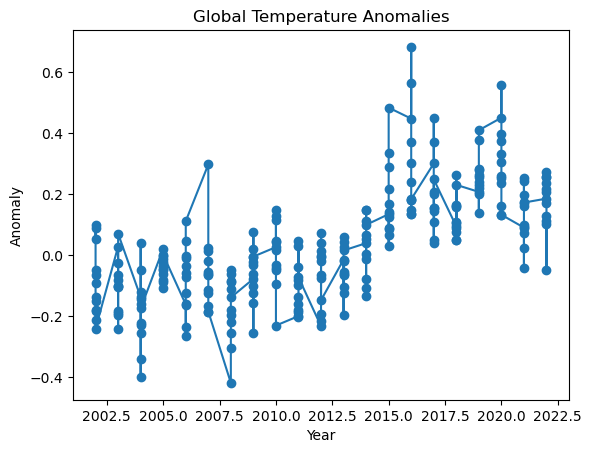

In [110]:


# Evaluate the modelscore
score = model.score(X_test, y_test)
print(f"The value of coefficient of determination (score) is: {score}")

# Plot the data
plt.plot(year, anomaly, "o-")
plt.xlabel("Year")
plt.ylabel("Anomaly")
plt.title("Global Temperature Anomalies")
plt.show()